In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
drive.mount('/content/drive/')
data=pd.read_csv('/content/drive/MyDrive/Oasis_internship/unemployment_rate.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [5]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [6]:
print(data.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [7]:
data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]

<ipython-input-8-0ffa54349b8d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


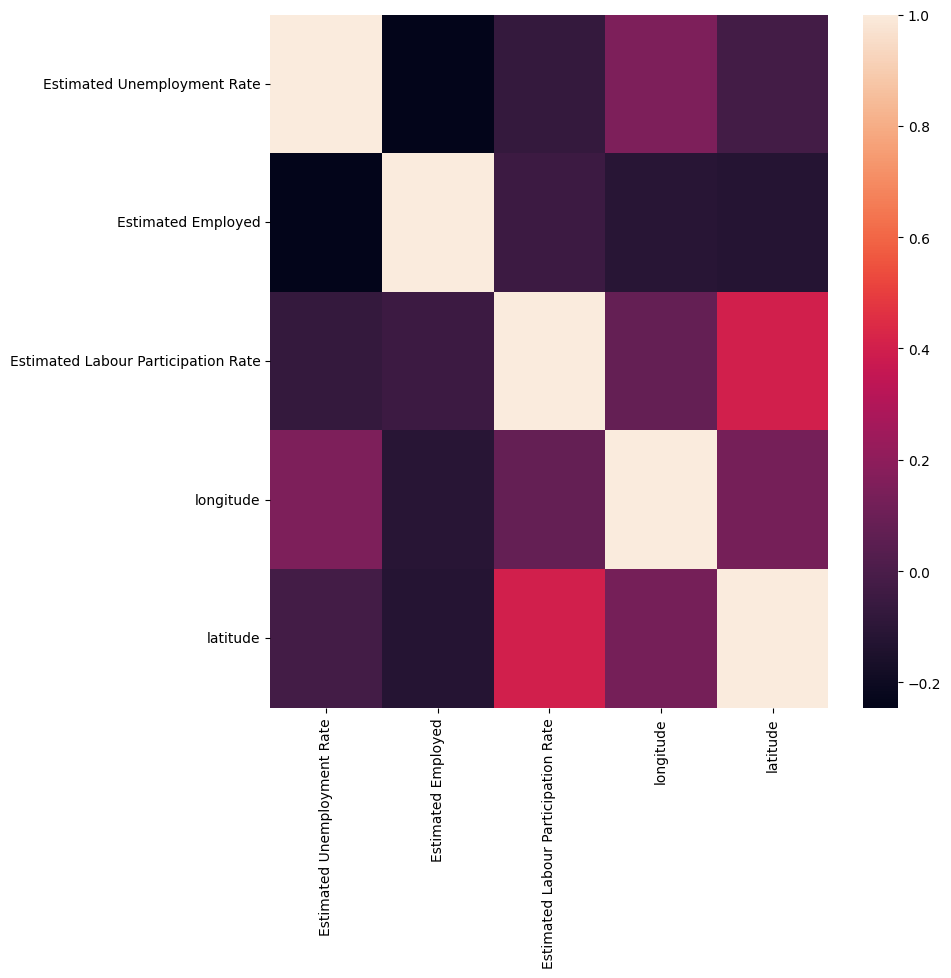

In [8]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr())
plt.show()

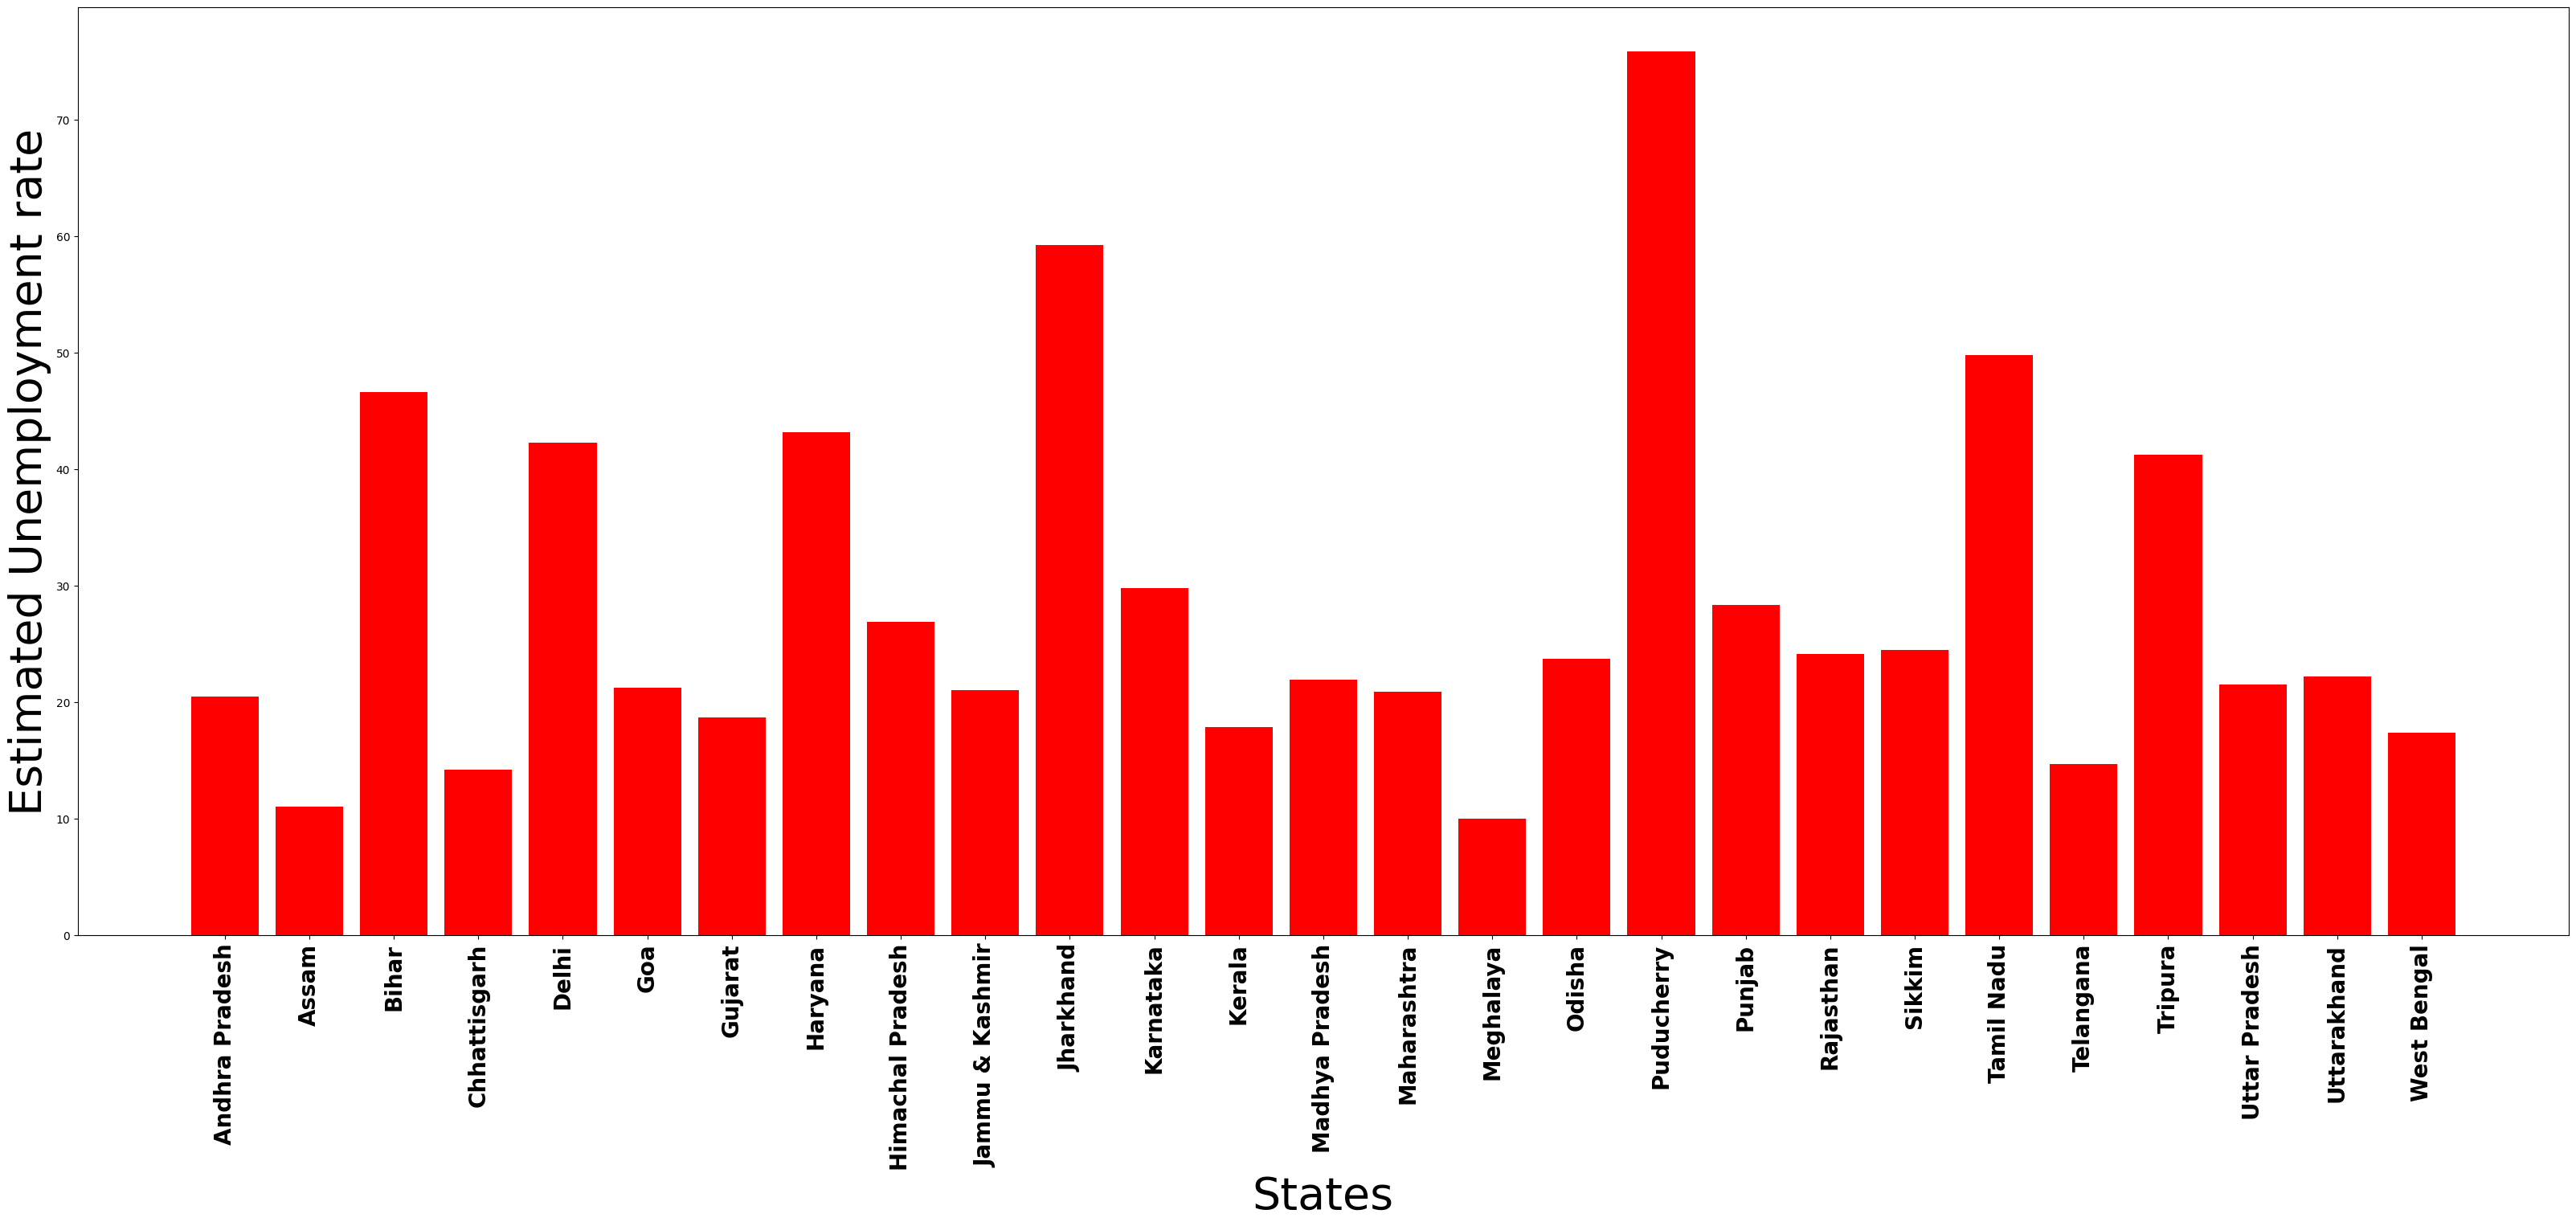

In [9]:
data = pd.DataFrame(data)
y=data['Estimated Unemployment Rate']
x=data['States']
pr= plt.figure(figsize=(40, 15))
plt.xlabel("States",fontsize = 40)
plt.ylabel("Estimated Unemployment rate",fontsize = 40)
plt.xticks(fontweight='bold',rotation='vertical',fontsize=20)
plt.bar(x,y, color='r',align='center')
plt.show()

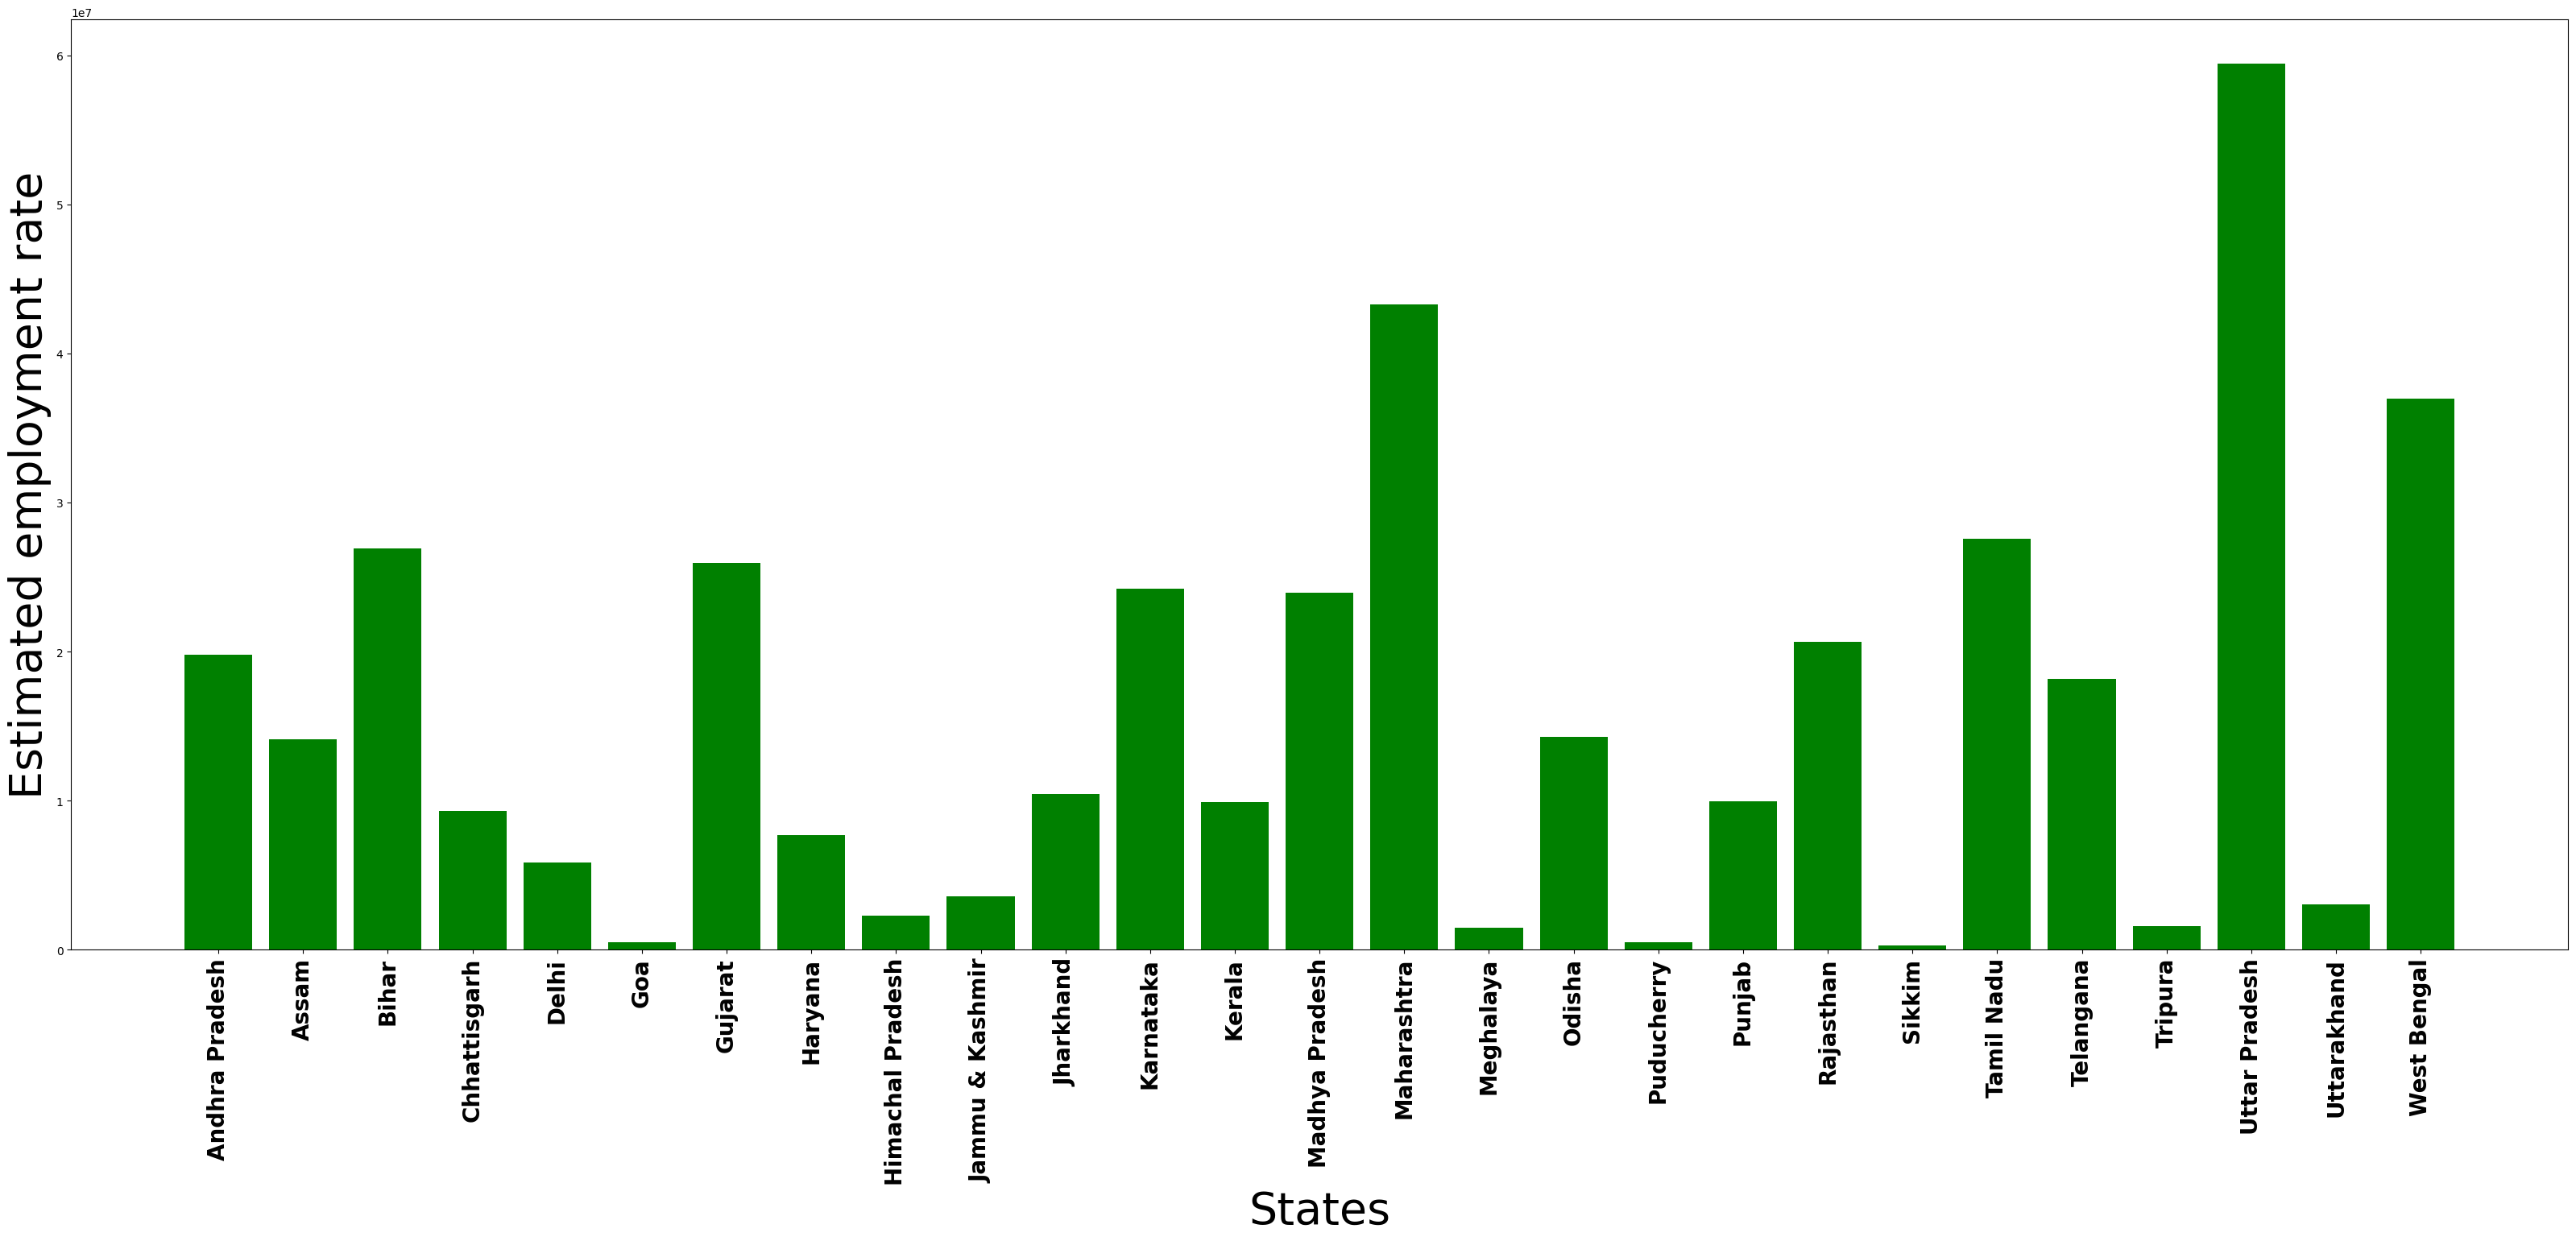

In [10]:
data = pd.DataFrame(data)
y=data['Estimated Employed']
x=data['States']
pr= plt.figure(figsize=(40, 15))
plt.xlabel("States",fontsize = 40)
plt.ylabel("Estimated employment rate",fontsize = 40)
plt.xticks(fontweight='bold',rotation='vertical',fontsize=20)
plt.bar(x,y, color='g',align='center')
plt.show()

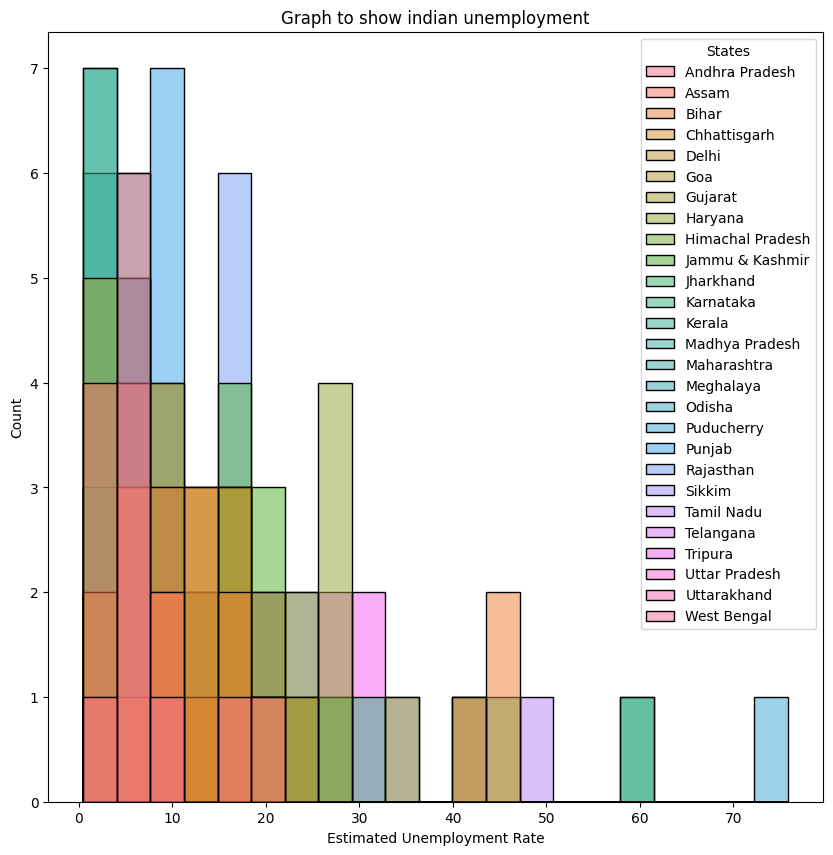

In [11]:
plt.figure(figsize=(10, 10))
plt.title("Graph to show indian unemployment")
sns.histplot(x="Estimated Unemployment Rate",hue = "States",data=data)
plt.show()

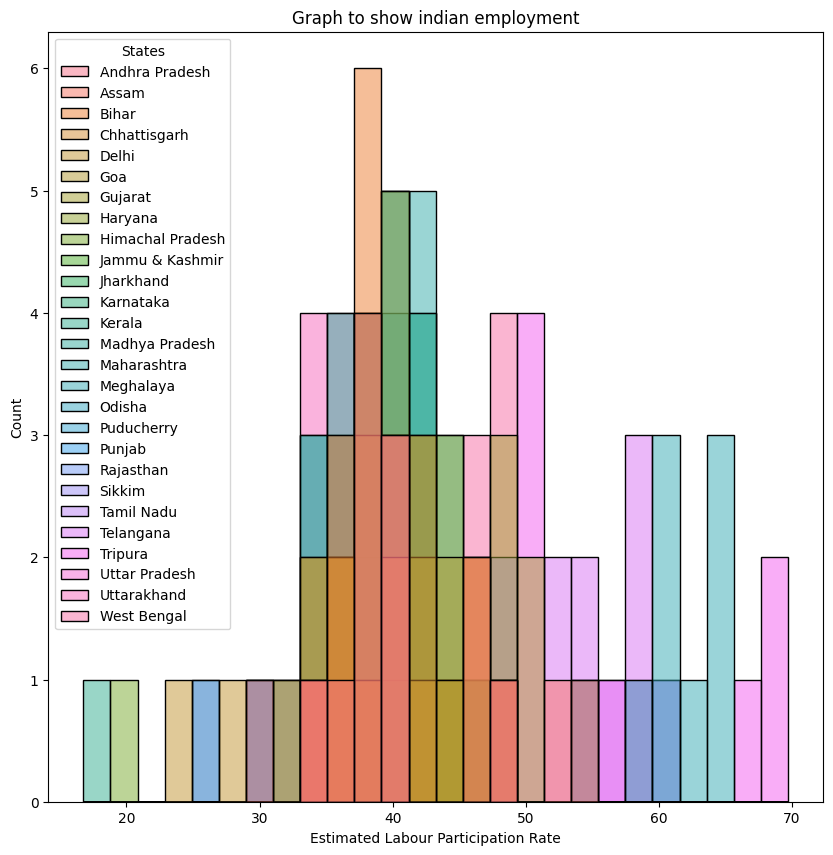

In [12]:
plt.figure(figsize=(10, 10))
plt.title("Graph to show indian employment")
sns.histplot(x="Estimated Labour Participation Rate",hue = "States",data=data)
plt.show()

In [13]:
import plotly.express as px
unemploment = data[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemploment, path=["Region", "States"],
                     values="Estimated Unemployment Rate",
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="Unemployment Rate in India")
figure.show()